In [3]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

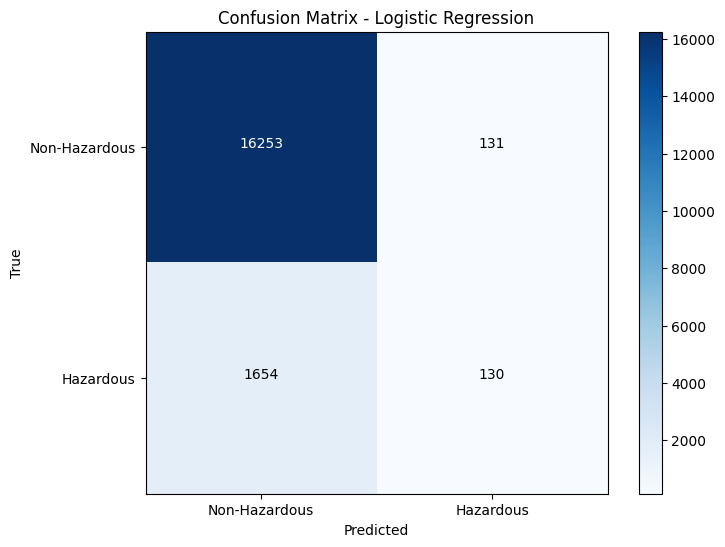

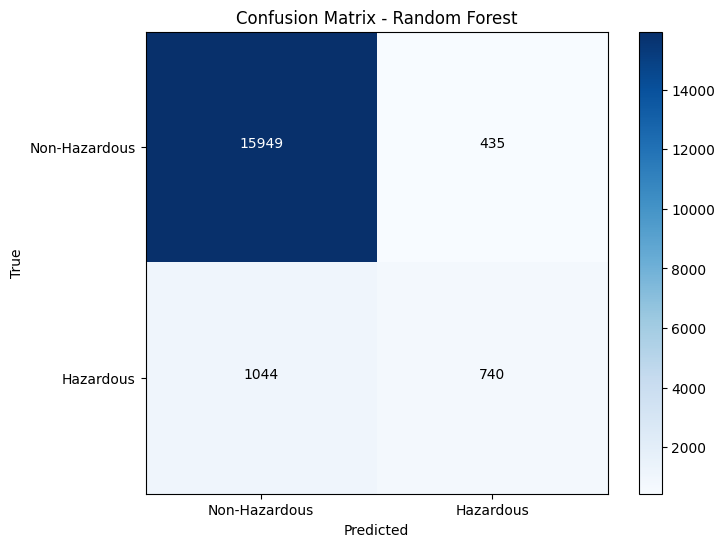

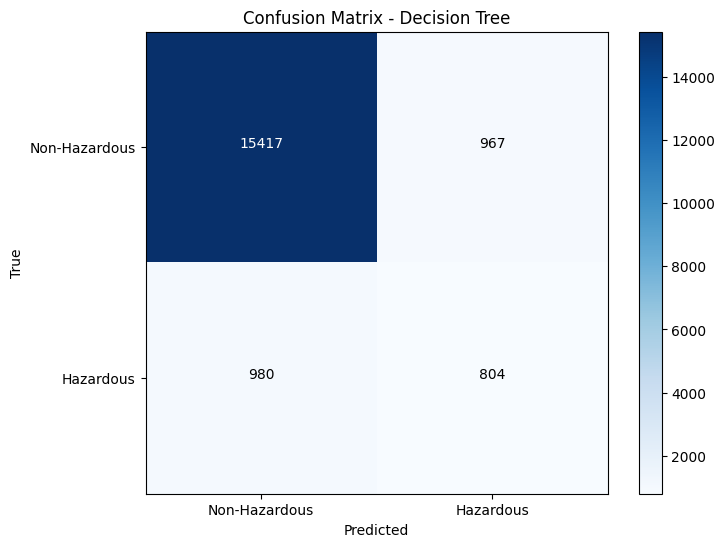

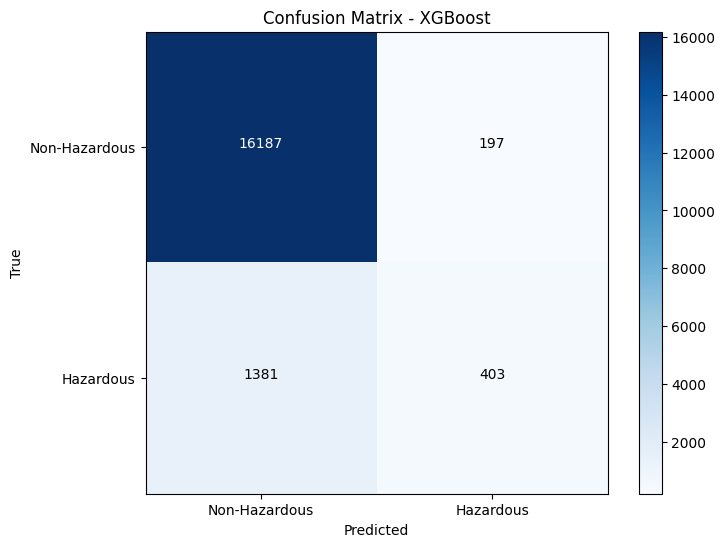

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix


data = pd.read_csv('neo.csv')


X = data.drop(columns=['hazardous'])
y = data['hazardous']

# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# numeric/categorical columns
numeric_features = X_train.select_dtypes(include=['float64']).columns.tolist()
categorical_features = ['orbiting_body']

# Tnumeric transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# categorical transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# models def
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Ttrening models
results = {}

for model_name, model in models.items():
    # Pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # model training
    pipe.fit(X_train, y_train)
    
    # test prediction
    y_pred = pipe.predict(X_test)
    
    # acc, rec, f1, precision
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-score': f1,
        'Precision': precision
    }
    
    # Wconfdusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
    plt.yticks([0, 1], ['Non-Hazardous', 'Hazardous'])

    # confusion matgrix labels
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.show()




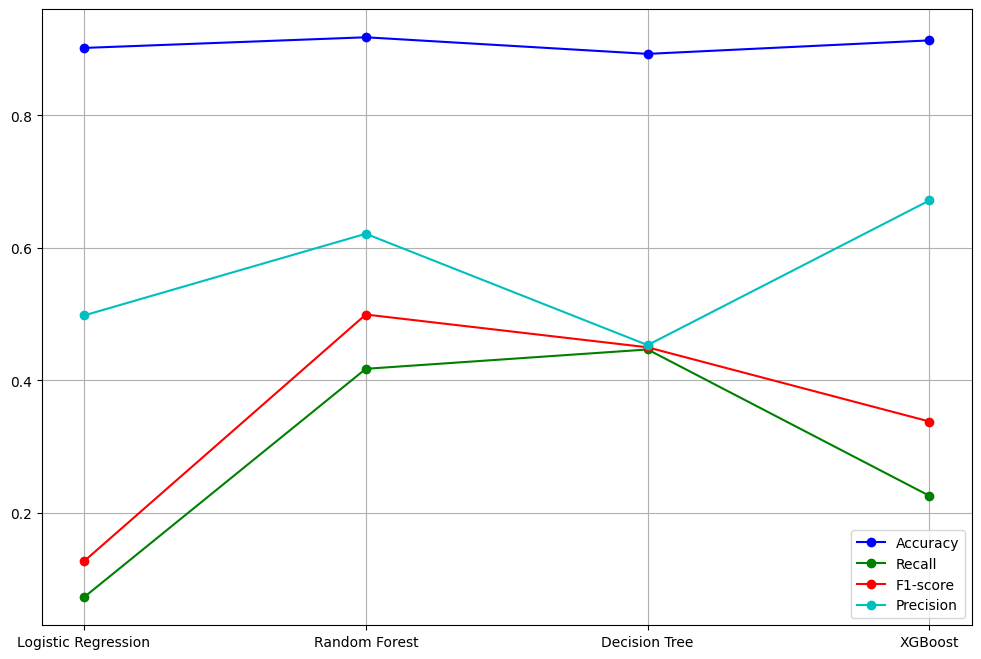

In [8]:
# acc, rec, f1, prec - chart
metrics = ['Accuracy', 'Recall', 'F1-score', 'Precision']
colors = ['b', 'g', 'r', 'c']
plt.figure(figsize=(12, 8))

for metric, color in zip(metrics, colors):
    plt.plot(results_df.index, results_df[metric], marker='o', color=color, label=metric)

plt.legend()
plt.grid(True)
plt.show()

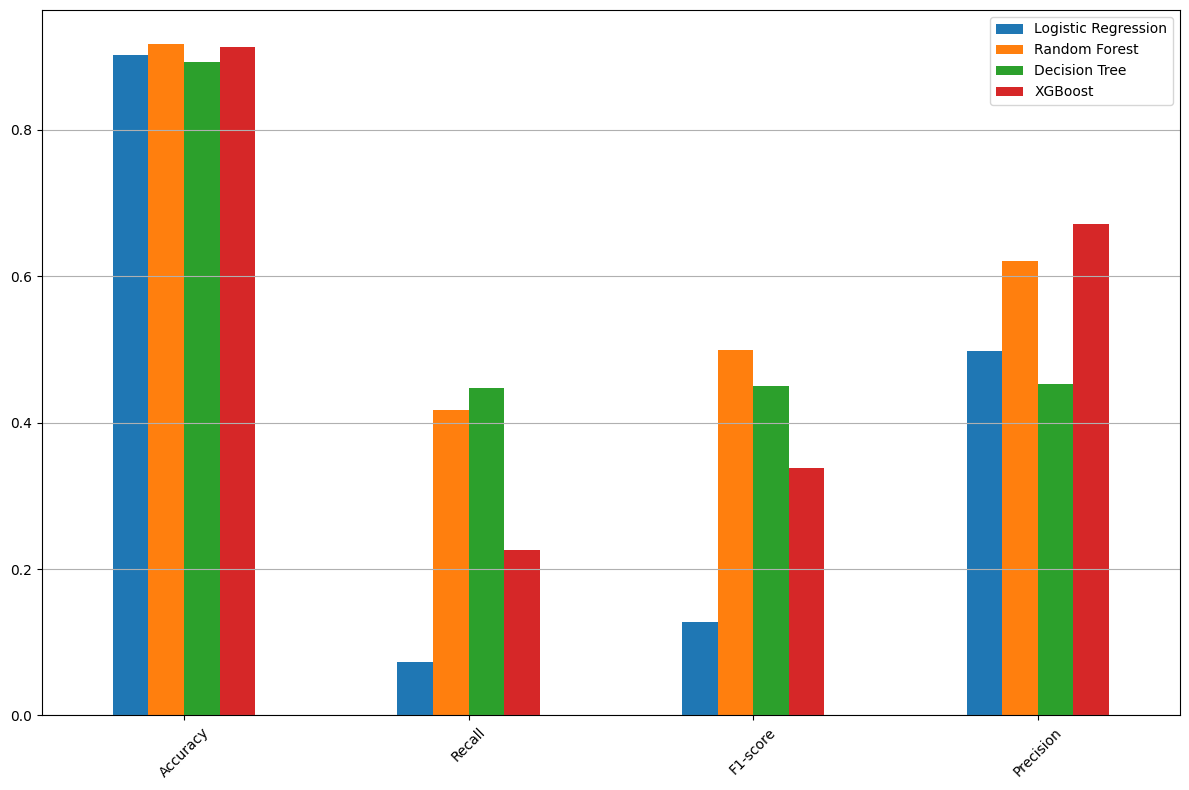

In [12]:
# bar chart
results_df.T.plot(kind='bar', figsize=(12, 8))

plt.legend(loc='best')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

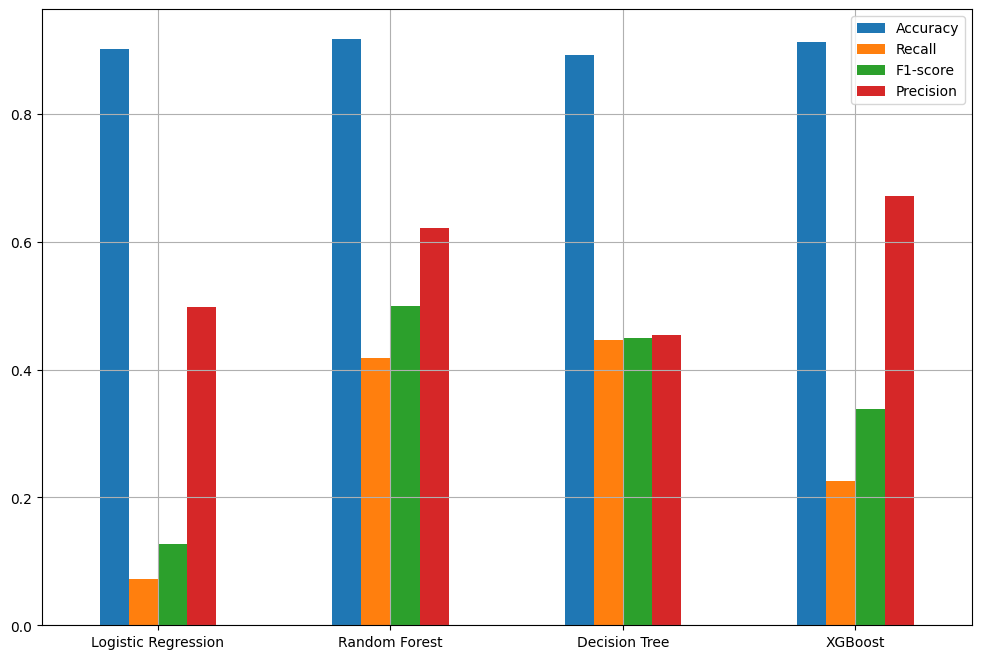

In [14]:
results_df.plot(kind='bar', figsize=(12, 8), rot=0)

plt.grid(True)
plt.show()

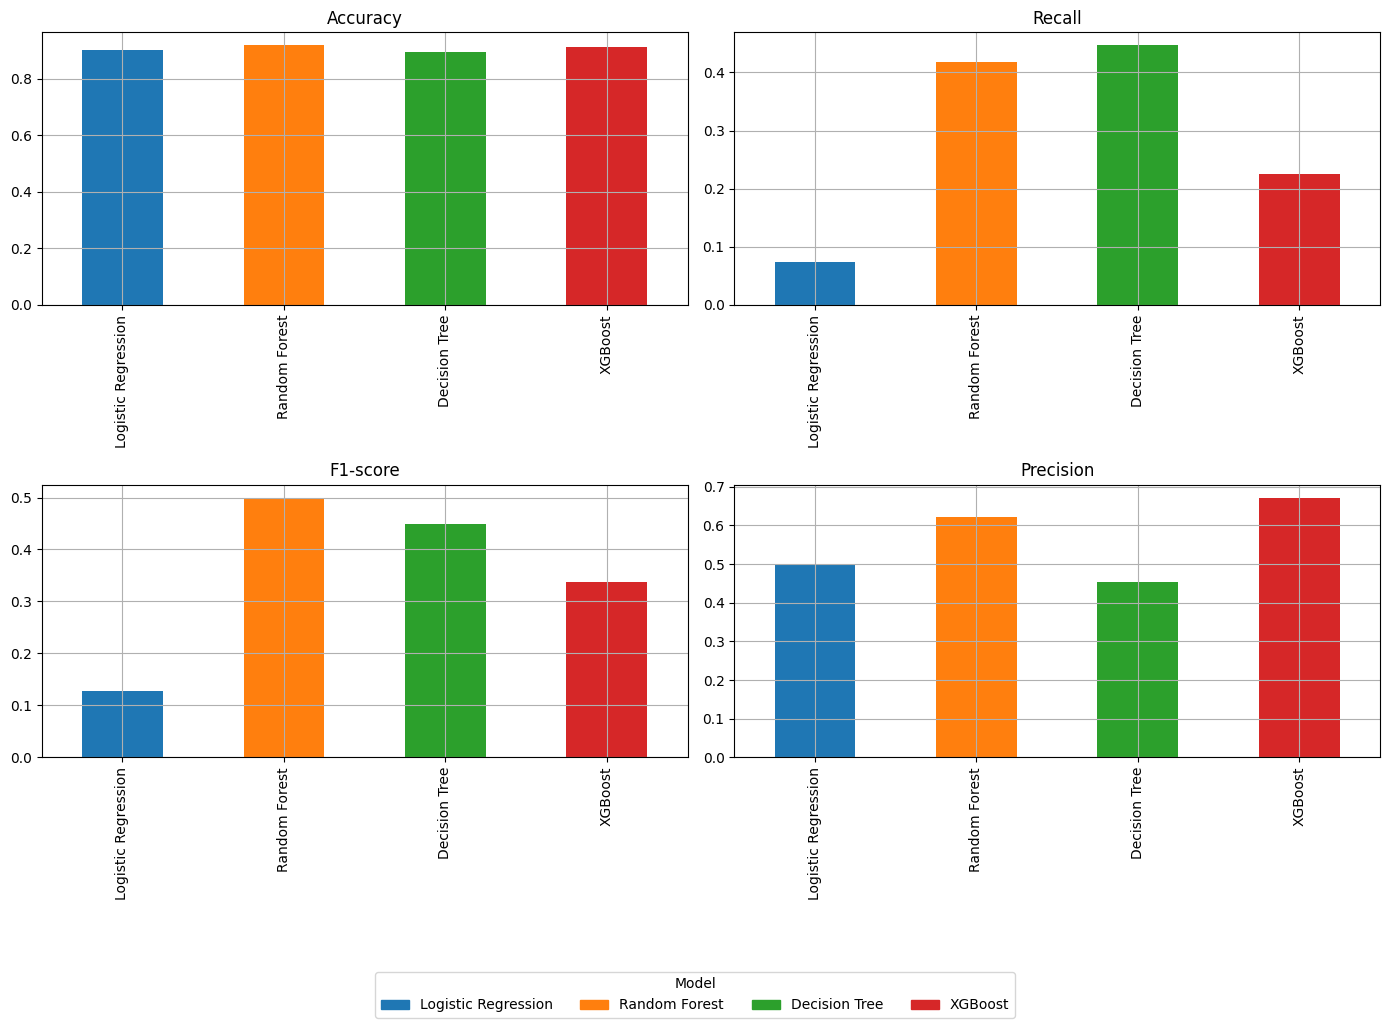

In [20]:
#chart all models

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
model_colors = {model: color for model, color in zip(results_df.index, colors)}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for metric, ax in zip(results_df.columns, axes.flatten()):
    bars = results_df[metric].plot(kind='bar', ax=ax, color=[model_colors[idx] for idx in results_df.index])
    ax.set_title(metric)
    ax.grid(True)

#chart legend
handles = [plt.Rectangle((0,0),1,1, color=model_colors[idx]) for idx in results_df.index]
fig.legend(handles, results_df.index, title="Model", loc='upper center', ncol=len(models), bbox_to_anchor=(0.5, -0.02))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
